In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist

<module 'tensorflow.keras.datasets.mnist' from 'C:\\Users\\prana\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [10]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 23s 2us/step


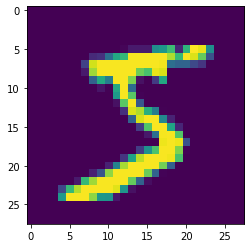

In [12]:
plt.imshow(training_images[0])

In [15]:
training_images.size/training_images[0].size

60000.0

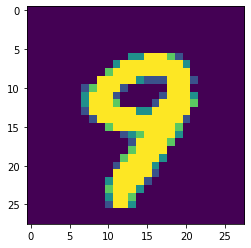

In [16]:
plt.imshow(training_images[5999])

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= .998):
            print("Accuracy reached 99.8%. Stopping training!")
            self.model.stop_training =True
            

In [18]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [19]:
callbacks = myCallback()

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics= 'accuracy' )

In [25]:
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])


Epoch 1/20
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1148 - accuracy: 0.9645
Epoch 2/20
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0385 - accuracy: 0.98804s - l
Epoch 3/20
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 4/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 5/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0168 - accuracy: 0.9949
Epoch 6/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 7/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0096 - accuracy: 0.99681s - ETA: 0s - loss: 0.0096 - accuracy: 
Epoch 8/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 9/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 10/20
1875/1

In [26]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0373 - accuracy: 0.9911


[0.03731558844447136, 0.991100013256073]

In [27]:
predict = model.predict(test_images)

In [42]:
predict

array([[3.8016651e-12, 2.3443908e-08, 3.3996403e-10, ..., 9.9999988e-01,
        4.5187736e-13, 1.2859398e-07],
       [1.8143367e-12, 1.0619612e-12, 1.0000000e+00, ..., 1.7782906e-16,
        8.5200909e-12, 2.1900327e-15],
       [4.2005854e-11, 9.9999928e-01, 5.8677657e-10, ..., 1.9363453e-07,
        4.5354068e-07, 2.2286473e-11],
       ...,
       [3.3534653e-17, 1.2062252e-12, 9.9586204e-16, ..., 7.1788035e-14,
        5.8238891e-12, 2.6779670e-11],
       [2.0344017e-14, 2.7442351e-15, 1.8702111e-18, ..., 2.3610446e-15,
        5.8657113e-10, 1.6002306e-12],
       [7.6672602e-10, 1.3606352e-10, 2.8021569e-12, ..., 4.9223253e-14,
        4.7605241e-08, 7.0157713e-14]], dtype=float32)

In [43]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)